## Import the libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.ensemble import RandomForestClassifier

## Load the data

In [125]:
# load the data and set PassengerID as index
df_train = pd.read_csv('train.csv').set_index('PassengerId')
df_test = pd.read_csv('test.csv').set_index('PassengerId')
data = [df_train, df_test]

## Exploratory Data Analysis

In [126]:
# Go through the train data and get some high-level information
df_train.describe(include='all')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [127]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<Axes: xlabel='Survived', ylabel='count'>

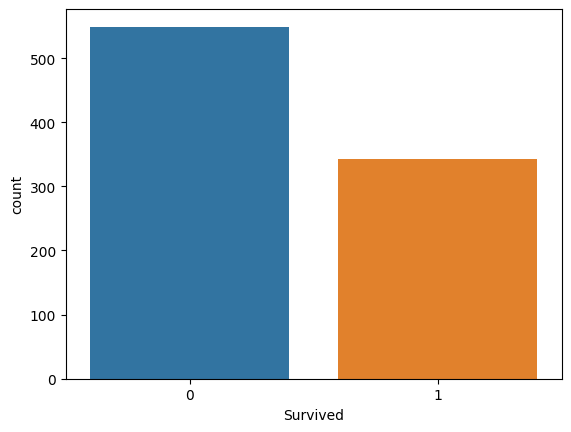

In [128]:
# The survival rate
sns.countplot(x='Survived', data=df_train)
plt.show()

In [129]:
fig = px.histogram(df_train, x='Survived', color_discrete_map= {'male':'blue', 'female':'pink'}, color='Sex', width=600, height=400)
fig.show()

Text(0.5, 1.0, 'Survival Rate: Male')

Text(0.5, 1.0, 'Survival Rate: Female')

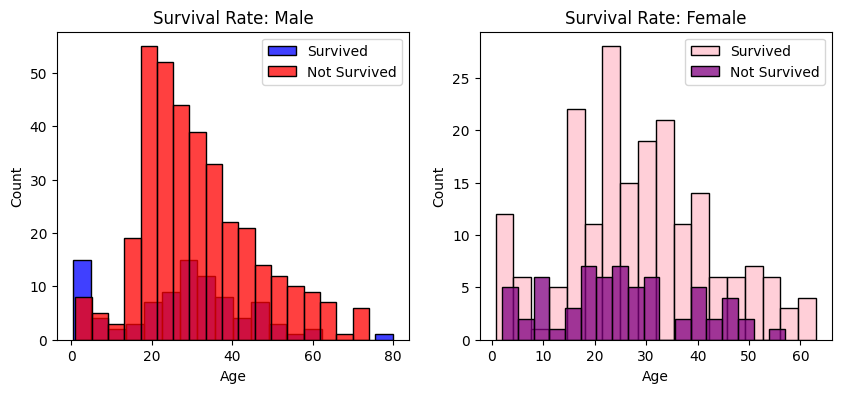

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sns.histplot(df_train[(df_train['Sex']== 'male') & (df_train['Survived']==1)]['Age'], bins=18, label='Survived', ax=axes[0], kde=False, color='blue')
ax = sns.histplot(df_train[(df_train['Sex']== 'male') & (df_train['Survived']==0)]['Age'], bins=18, label='Not Survived', ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Survival Rate: Male')

ax = sns.histplot(df_train[(df_train['Sex']== 'female') & (df_train['Survived']==1)]['Age'], bins=18, label='Survived', ax=axes[1], kde=False, color='pink')
ax = sns.histplot(df_train[(df_train['Sex']== 'female') & (df_train['Survived']==0)]['Age'], bins=18, label='Not Survived', ax=axes[1], kde=False, color='purple')
ax.legend()
ax.set_title('Survival Rate: Female')

In [131]:
for dataset in data: # apply it to train and test dataset
    #extract the titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset.apply(lambda x:'child' if x['Title'] =='Master' else x['Sex'], axis=1)
    # extract the family names
    dataset['Family_Name'] = dataset.Name.str.split(',').str[0]


In [132]:
# Survived per Embarked
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Survived', ylabel='count'>

,Title,Survived
1,female,0.742038
0,child,0.575000
2,male,0.160149


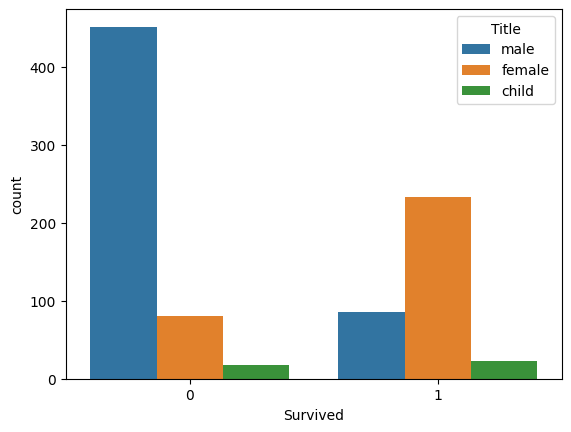

In [133]:
# Survived per title (male, female, child)
sns.countplot(x='Survived',hue="Title", data=df_train)
df_train[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.show()

In [134]:

femaleOrChild = df_train[(df_train['Title'] == 'female') | (df_train['Title']== 'child')]
femaleOrChild_ns = femaleOrChild[femaleOrChild['Survived'] == 0]
femaleOrChild_ns.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
count,98.0,98.000000,98,98,79.000000,98.000000,98.000000,98,98.000000,6,98,98,98
unique,NaN,NaN,98,2,NaN,NaN,NaN,61,NaN,4,3,2,58
top,NaN,NaN,"Palsson, Master. Gosta Leonard",female,NaN,NaN,NaN,347082,NaN,G6,S,female,Andersson
freq,NaN,NaN,1,81,NaN,NaN,NaN,6,NaN,2,76,81,6
mean,0.0,2.877551,NaN,NaN,21.316456,1.724490,1.112245,NaN,25.263183,NaN,NaN,NaN,NaN
std,0.0,0.412818,NaN,NaN,14.564000,2.054819,1.291388,NaN,23.561380,NaN,NaN,NaN,NaN
min,0.0,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,6.750000,NaN,NaN,NaN,NaN
25%,0.0,3.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,9.828125,NaN,NaN,NaN,NaN
50%,0.0,3.000000,NaN,NaN,21.000000,1.000000,1.000000,NaN,21.037500,NaN,NaN,NaN,NaN
75%,0.0,3.000000,NaN,NaN,30.250000,3.000000,2.000000,NaN,30.737500,NaN,NaN,NaN,NaN


In [135]:
male = df_train[df_train['Title']== 'male']
male_s = male[male['Survived'] == 1]
male_s.describe(include='all')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
count,86.0,86.000000,86,86,72.000000,86.000000,86.000000,86,86.000000,38,86,86,86
unique,NaN,NaN,86,1,NaN,NaN,NaN,80,NaN,35,3,1,85
top,NaN,NaN,"Williams, Mr. Charles Eugene",male,NaN,NaN,NaN,1601,NaN,E24,S,male,Daly
freq,NaN,NaN,1,86,NaN,NaN,NaN,5,NaN,2,59,86,2
mean,1.0,1.930233,NaN,NaN,34.069444,0.244186,0.104651,NaN,42.700390,NaN,NaN,NaN,NaN
std,0.0,0.955365,NaN,NaN,11.912032,0.483518,0.376644,NaN,78.218225,NaN,NaN,NaN,NaN
min,1.0,1.000000,NaN,NaN,16.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,1.0,1.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN
50%,1.0,2.000000,NaN,NaN,32.000000,0.000000,0.000000,NaN,26.468750,NaN,NaN,NaN,NaN
75%,1.0,3.000000,NaN,NaN,40.500000,0.000000,0.000000,NaN,52.554200,NaN,NaN,NaN,NaN


In [138]:
family_avg_sv=femaleOrChild[['Family_Name', 'Survived']].groupby('Family_Name').mean().sort_values(by='Survived', ascending=True)
family_avg_sv[family_avg_sv['Survived'].between(0.1,0.9)]

,Survived
Family_Name,
Andersson,0.142857
Allison,0.333333
Carter,0.750000
Asplund,0.750000


## Engineering Features

In [139]:
# add both train and test data into one dataframe 
df = pd.concat([df_train,df_test], axis=0, sort=False)

In [140]:
df['ISfemaleOrchild'] = ((df['Title']=='child') | (df['Title']=='female'))

In [141]:
family = df.groupby(df.Family_Name).Survived

In [142]:
df['FamilyCount'] = family.transform(lambda x: x[df.ISfemaleOrchild].fillna(0).count())

In [143]:
df['FamilyCount'] = df.mask(df.ISfemaleOrchild, df['FamilyCount'] - 1, axis=0).FamilyCount

In [144]:
df['FamilySurvived'] = family.transform(lambda x: x[df.ISfemaleOrchild].fillna(0).sum())
df['FamilySurvived'] = df.mask(df.ISfemaleOrchild, df.FamilySurvived - df.Survived.fillna(0), axis=0).FamilySurvived
df['FamilySurvivalRate'] = (df.FamilySurvived / df.FamilyCount.replace(0, np.nan))

df['IsSinglePas'] = df.FamilyCount == 0



In [145]:
df_train['Embarked'].value_counts()
# we can see S (Southamption) is the most common

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [146]:
df['Embarked'].fillna('S', inplace=True)

## 6- Create Random Forest  Models

In [147]:
X = pd.concat([
    df.FamilySurvivalRate.fillna(0),
    df.IsSinglePas.astype(int),
    # relplace categorical varibales with numbers
    df.Title.replace({'female': 0, 'male': 1, 'child':2}),
    df.Embarked.replace({'S': 0, 'Q': 1, 'C': 2 }),
], axis=1)
X.head(2)

,FamilySurvivalRate,IsSinglePas,Title,Embarked
PassengerId,,,,
1,0.0,1,1,0
2,0.0,1,0,2


In [148]:
train_x, test_x = X.loc[df_train.index], X.loc[df_test.index]
train_y = df.Survived.loc[df_train.index]

In [149]:
#Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
y_rfpredict = random_forest.predict(test_x).astype(int)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

RandomForestClassifier()

83.16

## 7- export the csv file

In [150]:
pd.DataFrame({'Survived': y_rfpredict}, index=df_test.index).reset_index().to_csv('survived.csv', index=False)